# Textual Models

This tutorial will go through the steps necessary to define a model using the support of an LLM which analyzes a textual description of the process and extracts constraints and actions.

## The `TextualModel` class

The `Declare4Py.ProcessModels.TextualModel` class is responsible for handaling the interaction with the LLM.

It methods utilities for importing a textual description of the model as `.txt` file, retriving constraints and actions of the process, exporting the result in a `.decl` format.

We show how to instantiate a `TextualModel`, notice that the the *textual description of the process* is required.
The *textual description* can be directly written in the initialization parameter or later on uploaded froma textual file using the `parse_form_file` method.

In [ ]:
from Declare4Py.ProcessModels.TextualModel import TextualModel

In [ ]:
# Model generated loading the description from a string

process_description = ""
description_filepath = "../../../tests/textual_models/process_descriptions/process1.txt"

with open(description_filepath, 'r') as file:
    process_description = file.read()

text_model = TextualModel(textual_description = process_description)

In [ ]:
# Model generated loading the description from a file

description_filepath = "../../../tests/textual_models/process_descriptions/process2.txt"

text_model_ff = TextualModel()
text_model_ff.parse_form_file(description_filepath)

These models will later in this tutorial, be used to show the capabilites to the LLM extraction.

Before proceding with the AI analysis it is important to set up an API key.

The code utilies a Groq object, to set up your **API key** complete the following steps:
1. Log in in *Groq Cloud* here: https://console.groq.com/
2. Using the top menu move to the *API Keys* page
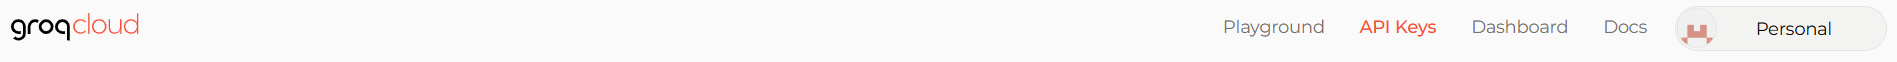
3. With the help of the *Create API Key* button create you personal API Key by choosing the display name
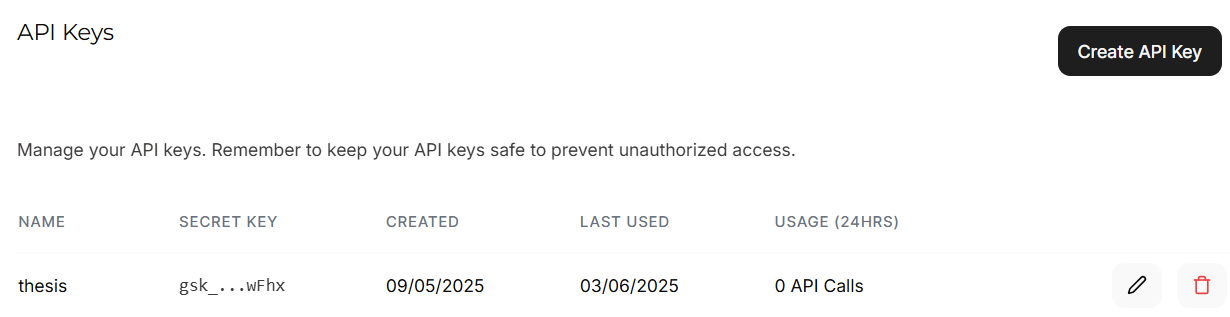
4. Save your key somewhere safe! (Later on you will be unable to see it)
5. Pass your `API_KEY` as paramether in the `to_decl` method call

Now you are all set and can procede.

In order to show the execution and results of the LLM's analysis we used a private and personal API key, which was later deactivated. If youu would like to run the code below you need to get your own API key as previously explained.

In [ ]:
API_KEY = "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"

### The `to_decl` method

Once the object has been initialized and the API key set up, we can procede with the **AI analysis**.
The method signatures identifies *two paramethers*, both optional:
- `interactive`: is a boolean value which identifies weather or not the chat will be interactive with the user or not.
- `llm_model`: is a string variable which identifies the exact model of the LLM, by default it uses the *llama-4-scout*, if the user try to use an model which does not exists or is incorrect and error will be trown.
- `api_key`: is a string variable which is used to set up the environment variable for the Groq's API key, if the key is invalid the error will be handled.

If you are looking for the correct **model name** you can use the *Groq Playground* page within the Groq Cloud, where you can simulate a chat with the LLM and retive a sample code for it.
Once in the *Groq Playground* page, select the *studio mode*, pick python as progmming language and choose your preferred LLM    
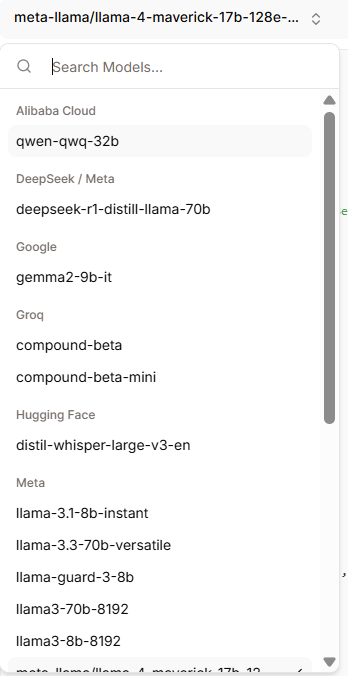  
From the sample code, copy the *model name* and use it as input parameter for the method.    
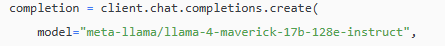

The method `to_decl` return a model loaded from the `.decl` file produced by the extraction of constraints and activities from the final AI response

This method utilies multiple support methods to handle the process from the interaction with the LLM to the extraction of constraints and activities to their parsing to respect the `.decl` syntax.

To better understand the whole process here is a step by step execution explained:
1. The first thing to do, even before running the code, is *setting the API key*
2. Once the value have been set the model is checked
3. The prompts, defined in the inizialization process, are formatted with the process textual description and some additional information based on wether the interaction status is true or false
4. Based on wether the *interaction* is active or not the process is sigltly different
    - *ON*: The LLM recives the prompts, if it consider it necessary to recive some further information from the user the a chat will be opened and the user will be able to interact until it is satsfied with the results, to close the chat the user will be required to type `exit`
    - *OFF*: The LLM recives the prompts and once a reply is retrived this goes directly to the next steps  
  
The prompts are the same in both cases, when the *interaction* is active or not. The prompts can be found and edited in `Declare4Py/Utils/Declare/DeclarePrompts.py`.  
  
5. The LLM response goes thorough a series of steps to extract all valuable information, the `parse_ai_result` method recive as input the last response of the LLM and does the following:
    - extract the constraints: `parse_response_constraints` method 
    - extract the activities: `parse_response_activities` method directly from the LLM response, if this is unable to retrive any activities they are extracted from the constraints with the `parse_activities` method
    - format the information: `parse_string_to_decl` method combines activities and constraints into string which is returned by the main method
6. Finally the *formatted model string* is converted into a model using the `parse_from_string` method from the `DeclareModel` class

More informations regarding the role of each method and variable can be found directly within the code.

The following cells offer some examples of runnable code to show some possible application and results of the `to_decl` method.

In [ ]:
model = text_model.to_decl(API_KEY) # result of the extraction process of the LLM

# results are stored to be observed later
model_filepath = "../../../tests/textual_models/model_results/process1.decl"
model.to_file(model_filepath)

with open(model_filepath, 'r') as file:
    model_content = file.read()
    print(model_content)

In [ ]:
model_ff = text_model_ff.to_decl(API_KEY)
model_ff_filepath = "../../../tests/textual_models/model_results/process2.decl"
model_ff.to_file(model_filepath)

with open(model_ff_filepath, 'r') as file:
    model_content = file.read()
    print(model_content)

Furthermore we performed the **LLM analysis** on the **PET Dataset** (Bellan, 2024). The original data and the results can be found within the `PET_dataset_analysis` folder.
From this file it can be access using the following path `../../../tests/textual_models/PET_dataset_analysis`.

More information regarding the performances of the LLM can be found in Irene Avezzù's bachelor thesis project available at the following link: [https://github.com/IreneAvezzu/bachelor_thesis_project](https://github.com/IreneAvezzu/bachelor_thesis_project)